In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits

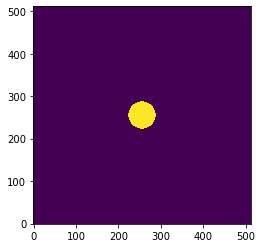

In [3]:
# Make the aperture:
N = 512 # Number of points
a = 8.0 # Total size of the grid, in meters 
aperture = np.zeros([N,N]) # Array containing the aperture (1 will be where light can enter, zero where it cannot)

x = np.linspace(-a/2.0,a/2.0,N) # x grid
y = np.linspace(-a/2.0,a/2.0,N) # y grid
R = 0.5 # Radius of our telescope 

# Make circular aperture
for i in range(0,N):
    for j in range(0,N):
        if((x[i]**2.0 + y[j]**2.0)**0.5 <= R):
            aperture[i,j] = 1.0
            
plt.imshow(np.real(aperture),origin='lower') # Plot the aperture

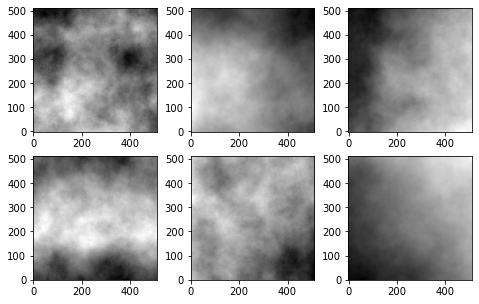

(100, 512, 512)


In [4]:
# Add phase information to the aperture 
phase = fits.open("/home/andresgo/Documents/Solar Astrophysics/Homework 1/pscreen-512x512x100.fits")[0].data

plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplot(231)
plt.imshow(phase[0,:,:],origin='lower',cmap='gray')
plt.subplot(232)
plt.imshow(phase[20-1,:,:],origin='lower',cmap='gray')
plt.subplot(233)
plt.imshow(phase[40-1,:,:],origin='lower',cmap='gray')
plt.subplot(234)
plt.imshow(phase[60-1,:,:],origin='lower',cmap='gray')
plt.subplot(235)
plt.imshow(phase[80-1,:,:],origin='lower',cmap='gray')
plt.subplot(236)
plt.imshow(phase[100-1,:,:],origin='lower',cmap='gray')
plt.show()

print(np.shape(phase))

# Variations of the phase with time cause by the atmospheric turbulence 

In [5]:
aperture0 = aperture*np.exp(1j*phase[0,:,:])
aperture1 = aperture*np.exp(1j*phase[20-1,:,:])
aperture2 = aperture*np.exp(1j*phase[40-1,:,:])
aperture3 = aperture*np.exp(1j*phase[60-1,:,:])
aperture4 = aperture*np.exp(1j*phase[80-1,:,:])
aperture5 = aperture*np.exp(1j*phase[100-1,:,:])

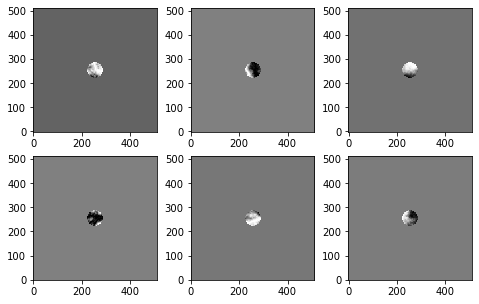

In [6]:
plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplot(231)
plt.imshow(np.real(aperture0),origin='lower',cmap='gray')
plt.subplot(232)
plt.imshow(np.real(aperture1),origin='lower',cmap='gray')
plt.subplot(233)
plt.imshow(np.real(aperture2),origin='lower',cmap='gray')
plt.subplot(234)
plt.imshow(np.real(aperture3),origin='lower',cmap='gray')
plt.subplot(235)
plt.imshow(np.real(aperture4),origin='lower',cmap='gray')
plt.subplot(236)
plt.imshow(np.real(aperture5),origin='lower',cmap='gray')
plt.show()

# Variations of the aperture by the effect of different phases 

In [7]:
# Now, from the (complex) aperture, we calculate the FFT:
# We need to rearange this:
PSF0 = (np.abs(np.fft.fft2(aperture0)))**2.0
PSF0 = np.fft.fftshift(PSF0,axes=(0,1))
PSF1 = (np.abs(np.fft.fft2(aperture1)))**2.0
PSF1 = np.fft.fftshift(PSF1,axes=(0,1))
PSF2 = (np.abs(np.fft.fft2(aperture2)))**2.0
PSF2 = np.fft.fftshift(PSF2,axes=(0,1))
PSF3 = (np.abs(np.fft.fft2(aperture3)))**2.0
PSF3 = np.fft.fftshift(PSF3,axes=(0,1))
PSF4 = (np.abs(np.fft.fft2(aperture4)))**2.0
PSF4 = np.fft.fftshift(PSF4,axes=(0,1))
PSF5 = (np.abs(np.fft.fft2(aperture5)))**2.0
PSF5 = np.fft.fftshift(PSF5,axes=(0,1))

# We are only going to be interested in the innermost part of the PSF
N_small = 200
PSF0 = PSF0[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
PSF1 = PSF1[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
PSF2 = PSF2[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
PSF3 = PSF3[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
PSF4 = PSF4[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
PSF5 = PSF5[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]

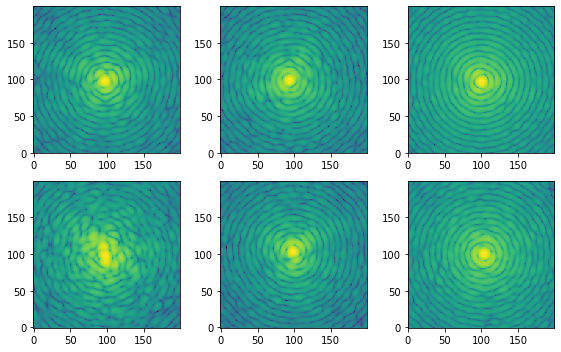

In [9]:
# We plot PSF in the log scale 
plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplot(231)
plt.imshow(np.log10(PSF0),origin='lower',)
plt.subplot(232)
plt.imshow(np.log10(PSF1),origin='lower')
plt.subplot(233)
plt.imshow(np.log10(PSF2),origin='lower')
plt.subplot(234)
plt.imshow(np.log10(PSF3),origin='lower')
plt.subplot(235)
plt.imshow(np.log10(PSF4),origin='lower')
plt.subplot(236)
plt.imshow(np.log10(PSF5),origin='lower')
plt.tight_layout()
plt.savefig('variations_PSF.png')
plt.show()

# PSF distorted by the effect of phase 

(0, 0.1)

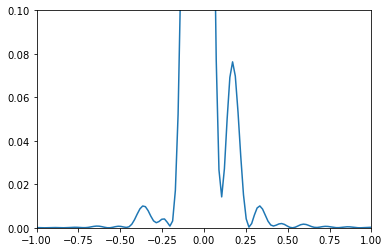

In [8]:
# At the moment, our x (and y) scales for the PSF are in pixels, so to speak. Realistically they should be in wave numbers
# Then we need to transform these wavenumbers into angles. We don't have time to clarify this but transformation is done in
# the following way:
x_step = a / N # Step of the original image 
xf = np.linspace(-1.0/(2.0*x_step),1.0/(2.0*x_step),N) # Space of spatial frequencies
llambda = 630E-9 # Wavelength we are observing at
theta = xf*llambda*206265 # Transform the spatial frequencies to angles
theta = theta[N//2-N_small//2:N//2+N_small//2] # Select the appropriate part for the narrowed down PSF
norm = np.amax(PSF0) # We want to normalize the PSF with respect to maximun first:
PSF0 /= norm
norm = np.amax(PSF1)
PSF1 /= norm
norm = np.amax(PSF2)
PSF2 /= norm
norm = np.amax(PSF3)
PSF3 /= norm
norm = np.amax(PSF4)
PSF4 /= norm
norm = np.amax(PSF5)
PSF5 /= norm
plt.plot(theta,PSF0[100]) # Plot the middle raw 
plt.xlim([-1,1])
plt.ylim([0,0.1])

In [9]:
scale = 48.0/725.0 # In arcsec
grid_interpolate = np.linspace(-31.5,31.5,61)*scale

from scipy import interpolate
f = interpolate.interp2d(theta,theta,PSF0)
PSF0_interpolate = f(grid_interpolate,grid_interpolate)
f = interpolate.interp2d(theta,theta,PSF1)
PSF1_interpolate = f(grid_interpolate,grid_interpolate)
f = interpolate.interp2d(theta,theta,PSF2)
PSF2_interpolate = f(grid_interpolate,grid_interpolate)
f = interpolate.interp2d(theta,theta,PSF3)
PSF3_interpolate = f(grid_interpolate,grid_interpolate)
f = interpolate.interp2d(theta,theta,PSF4)
PSF4_interpolate = f(grid_interpolate,grid_interpolate)
f = interpolate.interp2d(theta,theta,PSF5)
PSF5_interpolate = f(grid_interpolate,grid_interpolate)

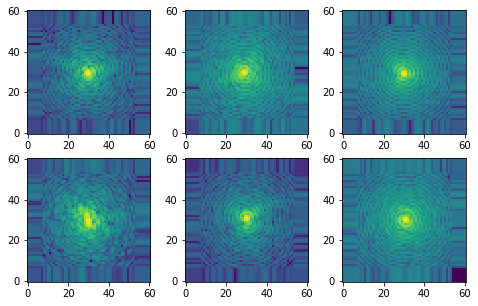

In [10]:
plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplot(231)
plt.imshow(np.log10(PSF0_interpolate),origin='lower',)
plt.subplot(232)
plt.imshow(np.log10(PSF1_interpolate),origin='lower')
plt.subplot(233)
plt.imshow(np.log10(PSF2_interpolate),origin='lower')
plt.subplot(234)
plt.imshow(np.log10(PSF3_interpolate),origin='lower')
plt.subplot(235)
plt.imshow(np.log10(PSF4_interpolate),origin='lower')
plt.subplot(236)
plt.imshow(np.log10(PSF5_interpolate),origin='lower')
plt.show()

# PSF interpolate for many effects of atmosphere 

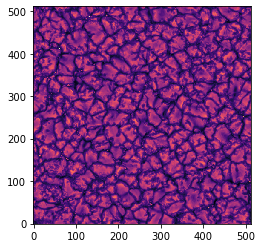

In [11]:
# Load the image from file 
image = fits.open("/home/andresgo/Documents/Solar Astrophysics/Homework 1/synth_sun.fits")[0].data
plt.imshow(image,origin='lower',cmap='magma')

In [12]:
# Now finally, convolve 
from scipy.signal import convolve2d

# We have to normalize again so that the surface of the PSF is one 
PSF0_interpolate /= np.sum(PSF0_interpolate)
PSF1_interpolate /= np.sum(PSF1_interpolate)
PSF2_interpolate /= np.sum(PSF2_interpolate)
PSF3_interpolate /= np.sum(PSF3_interpolate)
PSF4_interpolate /= np.sum(PSF4_interpolate)
PSF5_interpolate /= np.sum(PSF5_interpolate)

image /= np.mean(image)

image_smeared0 = convolve2d(image,PSF0_interpolate,mode='same',boundary='symm') 
image_smeared0 /= np.mean(image)
image_smeared1 = convolve2d(image,PSF1_interpolate,mode='same',boundary='symm') 
image_smeared1 /= np.mean(image)
image_smeared2 = convolve2d(image,PSF2_interpolate,mode='same',boundary='symm') 
image_smeared2 /= np.mean(image)
image_smeared3 = convolve2d(image,PSF3_interpolate,mode='same',boundary='symm') 
image_smeared3 /= np.mean(image)
image_smeared4 = convolve2d(image,PSF4_interpolate,mode='same',boundary='symm') 
image_smeared4 /= np.mean(image)
image_smeared5 = convolve2d(image,PSF5_interpolate,mode='same',boundary='symm') 
image_smeared5 /= np.mean(image)

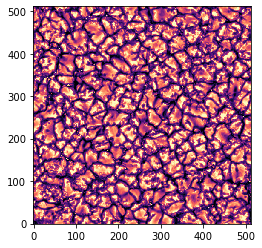

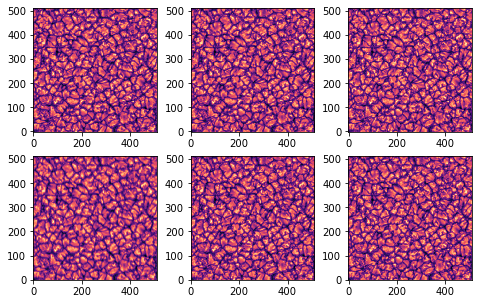

In [13]:
plt.imshow(image,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')

plt.magma()
plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplot(231)
plt.imshow(image_smeared0,origin='lower',)
plt.subplot(232)
plt.imshow(image_smeared1,origin='lower')
plt.subplot(233)
plt.imshow(image_smeared2,origin='lower')
plt.subplot(234)
plt.imshow(image_smeared3,origin='lower')
plt.subplot(235)
plt.imshow(image_smeared4,origin='lower')
plt.subplot(236)
plt.imshow(image_smeared5,origin='lower')
plt.show()

# Original image and images smeared by the PSF interpolated 

In [19]:
print(np.std(image),',',np.std(image_smeared0),',',np.std(image_smeared1),',',np.std(image_smeared2),
      ',',np.std(image_smeared3),',',np.std(image_smeared4),',',np.std(image_smeared5))

0.1712641602824972 , 0.1396631920184718 , 0.13954905862346256 , 0.14390430018724654 , 0.12127548706776459 , 0.13896250994645656 , 0.14087637567848976


In [26]:
# Add phase information to the aperture 
Friedpar = fits.open("/home/andresgo/Documents/Solar Astrophysics/Homework 1/r0s.fits")[0].data
print(np.shape(Friedpar))
for i in range(0,6):
    print(Friedpar[20*i-1])


(100,)
0.0999999999888065
0.10024509210574278
0.19957933703847042
0.050483879931509976
0.09978337742535094
0.0999999999888065


In [28]:
aperturer_sum = 0
for i in range(0,100):
    aperturer_sum += np.exp(1j*phase[0,:,:])